# **Introdução**

## **Adicionar o intuito do projeto de forma sussinta e aberta ao desenvolvimento**

# **Início de preparação dos componentes para a aplicação do aprendizado de máquina**

## **Carregamento e definição dos campos da base de dados**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import random

In [ ]:
# Bibliotecas para o KNN
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Bibliotecas para a regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Redução de dimensionalidade dentro da base abalone, voltando-a para a meta de "Rings".
colnames = ['Sex', 'Lenght', 'Diameter', 'Height', 'WholeWeight', 'ShuckeDWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
base = pd.read_csv('abalone_limpa.csv', header= None, names = colnames, na_values=["-"])

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4149 non-null   object 
 1   Lenght         4149 non-null   float64
 2   Diameter       4149 non-null   float64
 3   Height         4149 non-null   float64
 4   WholeWeight    4149 non-null   float64
 5   ShuckeDWeight  4149 non-null   float64
 6   VisceraWeight  4149 non-null   float64
 7   ShellWeight    4149 non-null   float64
 8   Rings          4149 non-null   float64
dtypes: float64(8), object(1)
memory usage: 291.9+ KB


In [ ]:
# Recorte da base para melhor utilização dos numericos
base_Num = base.drop("Sex", axis=1)
base_Num_NoRings = base_Num.drop(["Rings"], axis=1)

# **Visualização**

In [ ]:
#identificação infantil e adulto
base_sex_adaptada = base.copy()

for x in range(0, len(base_sex_adaptada)):
  if base_sex_adaptada.loc[x, 'Sex'] == 'I':
    base_sex_adaptada.loc[x, 'Sex'] = 0
  else:
    base_sex_adaptada.loc[x, 'Sex'] = 1
base_sex_adaptada

,Sex,Lenght,Diameter,Height,WholeWeight,ShuckeDWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4144,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,10.0
4145,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4146,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4147,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


<ipython-input-10-0d9e276df2ee>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(base.corr(), vmin = 0.5, vmax = 1, annot = True, center = 0.8, fmt = '.2f', cmap = 'viridis', annot_kws = {'color': 'black'})


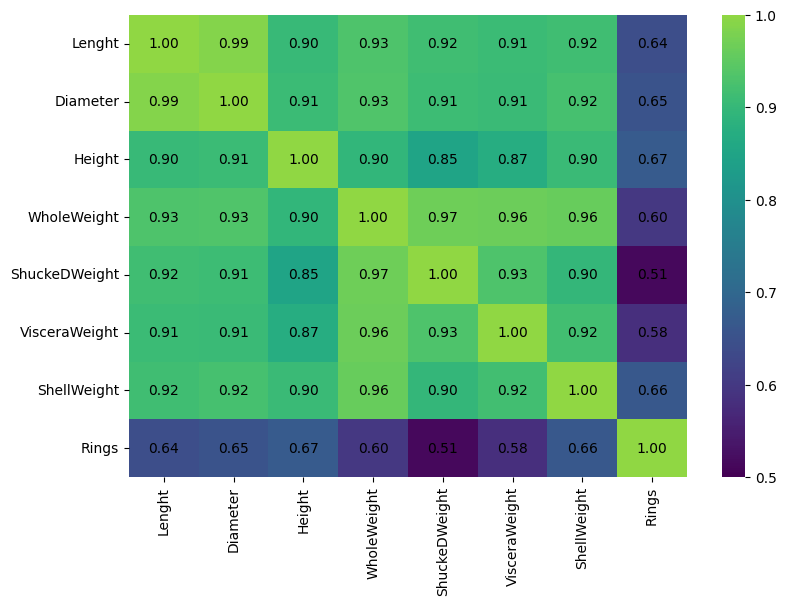

In [ ]:
#Coeficiente de correlação linear
plt.figure(figsize = (9, 6))
sns.heatmap(base.corr(), vmin = 0.5, vmax = 1, annot = True, center = 0.8, fmt = '.2f', cmap = 'viridis', annot_kws = {'color': 'black'})
plt.show()

**Conclusões feitas com base no heatmap acima:**

**Acatando os dois maiores índices de determinação, no caso "Height" e "ShellWeight", como dimensões imutáveis dentro da base de dados, pelo seu alto coeficiênte com "Rings". Podemos observar que há uma correlação linear de 99% entre as colunas Lenght e Diameter. Com base nisso, é conclusivel que são mutuamente representados, assim, utilizaremos apenas a coluna Diameter pela sua maior correlação com a coluna Rings.**

**Além disso, quanto a representatividade, a coluna "WholeWeight" quando comparada a "ShuckeDWeight" e "VisceraWeight", possui uma correlação linear de 0.97 e 0.96, respectivamente, sendo assim, podemos determina-la, como determinante para as duas, tanto pela sua alta correlação, quanto pela coeficiente com rings.**





## **Atribuição de classificação quanto ao índice de correlação das váriaveis**

In [ ]:
# Adicionar texto de justificativa de correlação

In [ ]:
colnames = ['Sex', 'Lenght', 'Diameter', 'Height', 'WholeWeight', 'ShuckeDWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
base_Classified = base_sex_adaptada.drop(['ShuckeDWeight', 'VisceraWeight', 'Lenght'], axis = 1)

# **Desenvolvimento dos algoritmos**

## **Implementação**

### **Regressão**

In [ ]:
def regressao_linear(eixo_X_coluna, eixo_Y_coluna, tamanho_grafico_X = None, tamanho_grafico_Y = None, cor_reta = 'blue'):
  try:
    plt.figure(figsize = (tamanho_grafico_X,tamanho_grafico_Y))
  except TypeError:
    pass
  try:
    sns.regplot(x = eixo_X_coluna, y = eixo_Y_coluna, line_kws={'color': cor_reta}, color = 'cyan')
  except (SyntaxError, ValueError):
    sns.regplot(x = eixo_X_coluna, y = eixo_Y_coluna)

**A função acima tem como objetivo facilitar a criação de gráficos de regressão linear. Para isso, são necessárias duas variáveis: "eixo_X_coluna" e "eixo_Y_coluna". Essas variáveis servem para definir quais dados estarão no eixo X e quais estarão no eixo Y.**

**Além disso, as variáveis "tamanho_grafico_X" e "tamanho_grafico_Y" definem o tamanho do gráfico nos eixos X e Y, respectivamente. Caso não haja interesse em modificar o tamanho do gráfico, basta não atribuir valores a essas variáveis. Além disso, existe a opção de definir uma cor para a reta de regressão, utilizando o atributo da variável "cor_reta". Nesse atributo, pode-se colocar o nome ou código da cor desejada.**

In [ ]:
def titulo(frase_titulo, frase_eixo_X, frase_eixo_Y, fonte_titulo=None, fonte_X=None, fonte_Y=None, negrito=False):
    if negrito:
        plt.title(frase_titulo, fontweight='bold', fontsize=fonte_titulo)
    else:
        plt.title(frase_titulo, fontsize=fonte_titulo)
    plt.xlabel(frase_eixo_X, fontsize=fonte_X)
    plt.ylabel(frase_eixo_Y, fontsize=fonte_Y)
    plt.show()

**A função acima tem como objetivo auxiliar na personalização dos gráficos, permitindo adicionar título, identificar os eixos x e y da regressão. Além disso, é possível ajustar o tamanho da fonte do título e dos eixos, bem como deixar o título em negrito.**

### **KNN**



#### **Determinação do Melhor K**

In [ ]:
# Partição de testes
X = base_sex_adaptada[['Sex', 'Diameter', 'Height', 'WholeWeight', 'ShellWeight']]
y = base_sex_adaptada['Rings']

Erro mínimo: 2.47 em K = 13


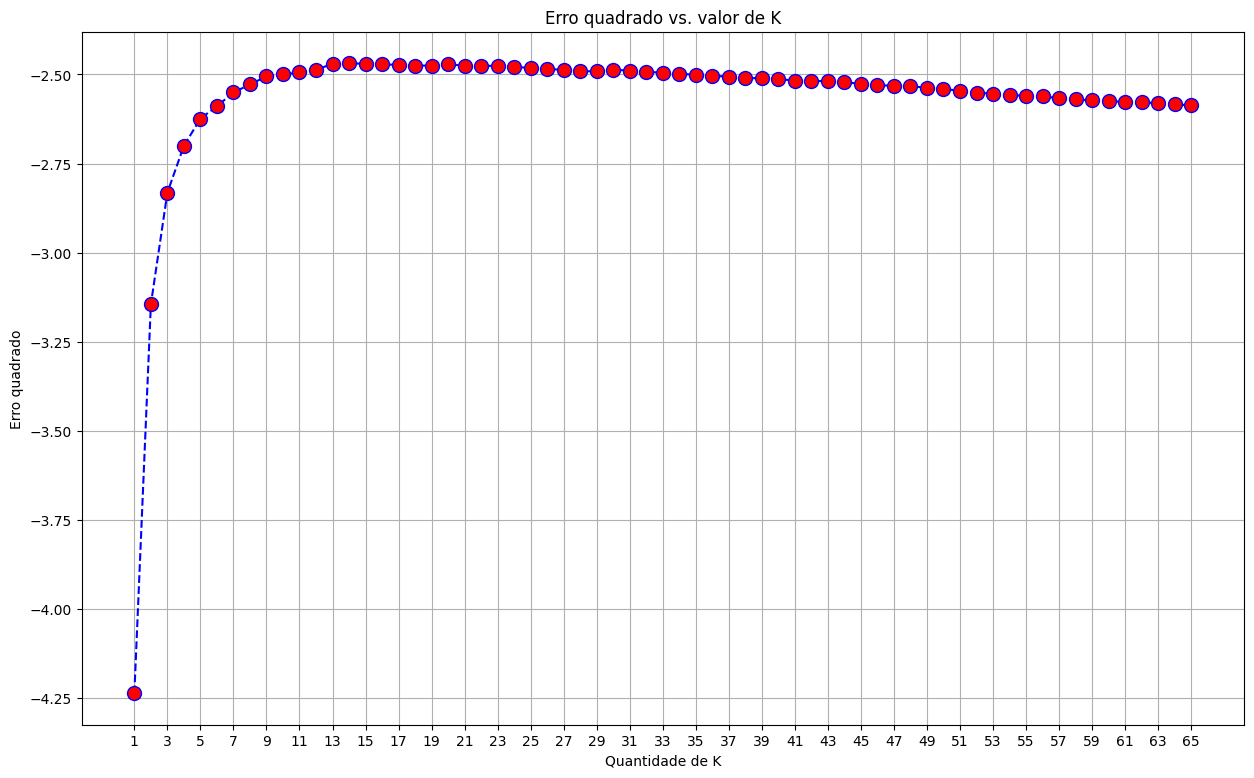

In [ ]:
# Fazer o teste dos vizinhos por acuracia (para definição da quantidade ideal)
teste_K = int(np.sqrt(base_sex_adaptada.shape[0])) + 1
num_array = []
for k in range(1, teste_K + 1):
  knn = KNeighborsRegressor(n_neighbors = k)
  my_scorer = make_scorer(mean_squared_error, greater_is_better=False)
  score = cross_val_score(knn, X = X, y = y, scoring= my_scorer, cv=5)
  num_array.append(score.mean())


plt.figure(figsize=(15,9))
plt.grid()
plt.plot(range(1, teste_K + 1),num_array,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Erro quadrado vs. valor de K')
plt.xlabel('Quantidade de K')
plt.xticks(range(1, teste_K + 1, 2))  # Define os valores dos ticks a cada 5 unidades
plt.ylabel('Erro quadrado')
print("Erro mínimo:",round(abs(max(num_array)), 2),"em K =",num_array.index(max(num_array)))

##**Regressão Lista**

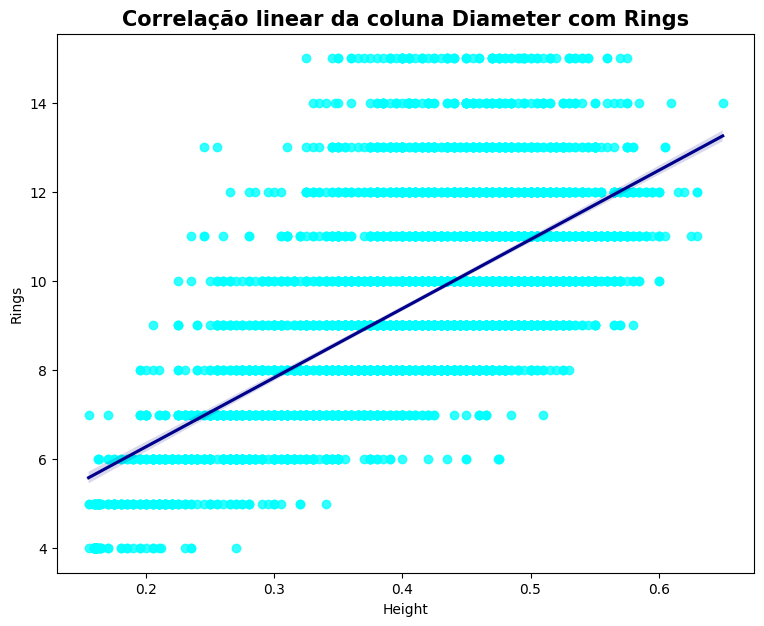

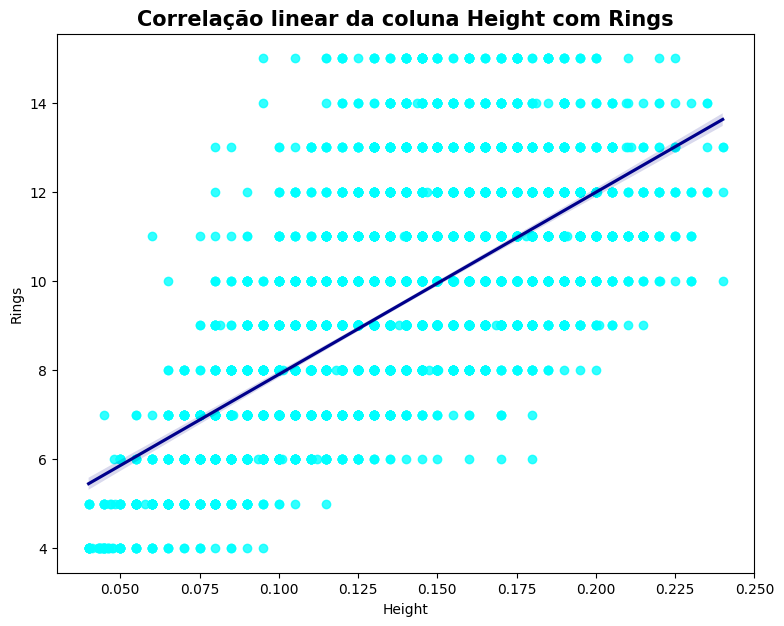

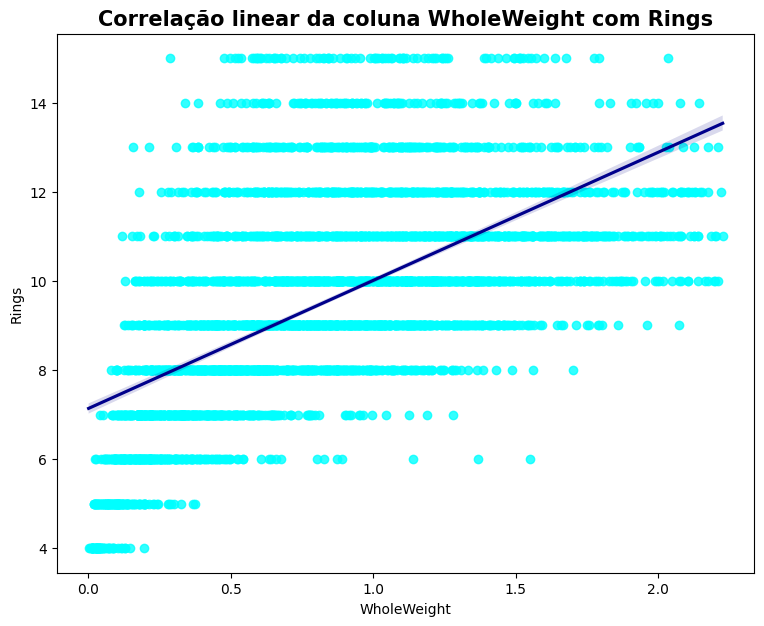

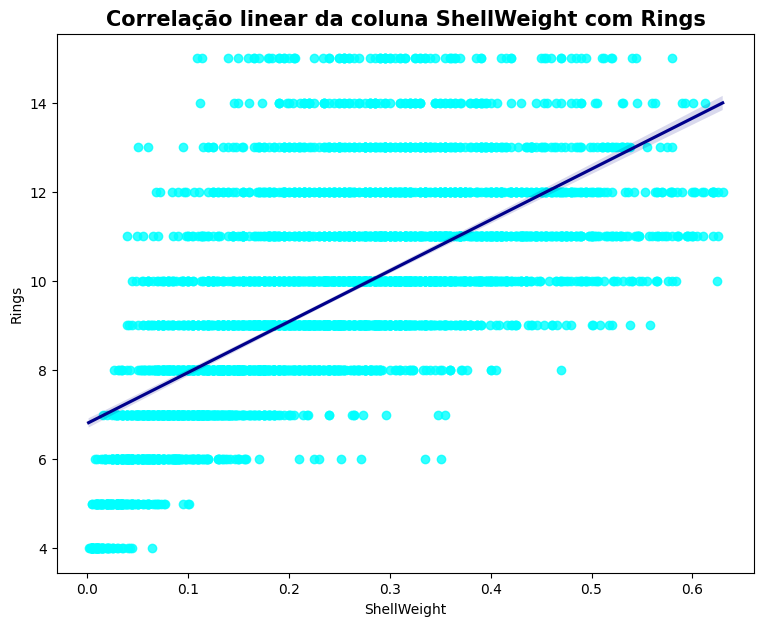

In [ ]:
regressao_linear(base_Classified['Diameter'], base_Classified['Rings'], 9, 7, 'darkblue')
titulo('Correlação linear da coluna Diameter com Rings', 'Height', 'Rings', 15, 10, 10, negrito = True)

regressao_linear(base_Classified['Height'], base_Classified['Rings'], 9, 7, 'darkblue')
titulo('Correlação linear da coluna Height com Rings', 'Height', 'Rings', 15, 10, 10, negrito = True)

regressao_linear(base_Classified['WholeWeight'], base_Classified['Rings'], 9, 7, 'darkblue')
titulo('Correlação linear da coluna WholeWeight com Rings', 'WholeWeight', 'Rings', 15, 10, 10, negrito = True)

regressao_linear(base_Classified['ShellWeight'], base_Classified['Rings'], 9, 7, 'darkblue')
titulo('Correlação linear da coluna ShellWeight com Rings', 'ShellWeight', 'Rings', 15, 10, 10, negrito = True)

In [ ]:
X = base_Classified[['Diameter', 'Height', 'WholeWeight', 'ShellWeight']]
y = base_Classified['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
medias = []
for x in range(1, 1000):
  mse = mean_squared_error(y_test, y_pred)
  medias.append(mse)

print("Mean Squared Error (MSE):", mse.round(2))

Mean Squared Error (MSE): 2.5


## **Comparação**

#**Justificativa da seleção dos algoritmos:**
**Através de um breve estudo da base de dados Abalone a que tivemos acesso, pudemos nos dar ao encontro de que, para pesquisadores, a métrica "Rings" seria a mais cara dentre todas as outras a ser definida quando um estudo de campo é veículado. Dado o cenário, enxergamos um pertinente trabalho a ser solucionado, que foi justamente utilizar-nos de dois algoritmos amplamente usados pela comunidade de profissioais de Machine Learning para ajudar na predição dessa trabalhosa métrica a qual os pesquisadores necessitam ao pesquisar novas amostras de Abalones. Dado isso, queremos exemplificar exatamente do porque nos utilizarmos de tais algoritmos, levando o leitor a uma compreensão clara de como e porque esse projeto é altamente favorável quando implementado em um cenário da vida real. Abaixo, os métodos e suas justificativas:**
#**1. KNN**
**Como um dos métodos, tivemos a implementação do conceito K-Neighbor Nearest, um algoritmo que, através de um ambiente computacional, replica uma dada base de dados na memória e é direcionada posteriormente para apoiar uma métrica atribuida ao valor de 'K' (e por isso K-Neighnor...). Tal métrica é então associada a uma outra etapa do algoritmo, responsável por calcular distâncias  entre as instâncias, para então preditar novos valores quando, por exemplo, apresenta-se uma nova instância. Nesse caso, claro, o valor preditado é exclusivamente para "Rings", porque buscamos treinar o algoritmo justamente para tal... Além disso, o treinamento foi feito da seguinte maneira:**

**Com os dados originais, podemos simplesmente replica-los (aleatoriamente e em menor quantidade) em uma nova variável, dessa variável, propositalmente apagamos os valores da coluna Rings e  utilizamos nosso modelo para preditar os possíveis valores faltantes, seguido por fim da comparação com os originários da pesquisa.**

**O que apresentamos aqui é, um modelo simples e muito poderoso. Suas vantagens de aplicação são claras, porque percebemos que não é necessário a configuração de demasiados parâmetros. Na via contrária aos benefícios, temos alguns fatores problemáticos em caso da adoção desta metodologia, como a necessidade de um espaço na memória dedicado para a base de referência em ambiente de produção, além do fator computacional exigido para os cálculos de distância, que podem tornar-se lentos e caros, devido a grande quantidade de elementos para rodar o modelo em uma nova predição.**

#**2. Regressão Linear**
**Em segundo caso, decidimos utilizar o famoso Algoritmo de Regressão Linear, o qual nos provê a possibilidade de preditar novos dados a partir do coeficiente  de correlação entre dados de colunas distintas, em relação a coluna alvo. Esse tipo de trabalho pode tanto ser feito apenas utilizando-se de uma variável em relação a alvo, ou então de multiplas em relação a essa última, para entender fielmente como um dado se relaciona a outro. No nosso caso, por exemplo, como tais tipos de dimensões (Peso, altura, etc) impactam na métrica 'Rings'.**

**No atual trabalho desenvolvido, decidimos utilizar-nos de modelos de regressão simples, isso é, apenas de uma variável para outra, ao invés de várias para uma, devido a natureza dos prazos impostos para tal implementação.**

**Já em relação a seus pontos temos por exemplo que, igualmente citado sobre o KNN, a implementação deste algoritmo como sendo relativamente simples, em via contrária temos também que exige muito menos poder computacional em um ambiente de produção, ja que o modelo se apoiará nesse caso sobre o modelo de coeficiente gerado pelo algoritmo primeiramente (não sendo necessário memória para manter as instâncias já treinadas). Alguns problemas relacionados a adoção deste método também podem gerar contradições, já que o modelo não é especialmente complexo e pode performar incorretamente dados que fogem do padrão treinado inicialmente. Com isso queremos dizer que o modelo é de certa forma 'engessado', seguindo estritamente um treino viabilizado pelas suposições criadas inicialmente por nossa equipe e, caso não sejam atendidas, tendem a levar novas instâncias fora do pressuposto a erros ao se buscar sua predição**
#**Implementação dos Algoritmos**
**Com tais apresentações e, através de ambas as aplicações iniciais a qual desenvolvemos acima no atual projeto, é notavel que, ambos os erros quadráticos apresentados, giram em torno de 2 e 3, o qual se mostra pouco distante do valor objetivado, sendo assim, depedendo apenas do ambiente no qual será implementado.Portanto, levamos ao fato que, na desenvoltura de ambos os algoritmos apresentados, não há realmente um ganhador que, através dos dados estatísticos captados, possa nos provar ser mais eficiente. Acreditamos que em um ambiente de produção, no qual teríamos um aplicativo ajudando aos pesquisadores para futuras análises de Abalones, seria de maior utilidade implementar o algoritmo de Regressão Linear devido ao seu baixo custo, com efetividade na predição da idade.**

